In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')  

In [151]:
def get_missings(df,plot=True,rotation=45,figsize=(10,5), * kwargs):
    labels,values,percent = list(),list(),list()
    if df.isna().sum().sum()>0:
        for column in df.columns:
            if df[column].isna().sum():
                labels.append(column)
                values.append(df[column].isna().sum())
                percent.append((df[column].isna().sum() / df.shape[0]) * 100)
        #Make a dataframe 
        missings=pd.DataFrame({'Columns':labels,'MissingValues':values,'MissingPercentage':percent}).sort_values(by='MissingPercentage',ascending=False)
        

        if plot:
            plt.figure(figsize=figsize)
            plot = sns.barplot(x=missings.Columns,y=round(missings.MissingPercentage, 2), palette = "tab20")
            for i in plot.patches:
                plot.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha = 'center', va = 'baseline', fontsize = 12,
                color = 'black', xytext = (0,1),
                textcoords = 'offset pixels')
            locs, labels = plt.xticks()
            plt.setp(labels, rotation=rotation,size=16)
            plt.xlabel('Columnas',size=18)
            plt.ylabel('Porcentaje',size=18)
            plot.set_title('Porcentaje de valores nulos',size=18)

        return missings
    else:
        return 'No se encontraron valores nulos.'

# **Tabla:** Countries Population
### Diccionario
| | Nombre de columna normalizada | Tipo de dato normalizado | Nombre original de la columna | Tipo de dato original | Descripción |
|:---:|---|---|---|---|---|
| 0 | country_name | str | country | str | Contiene el nombre del país |
| 1 | country_code | str | countryiso3code | str | Contiene el código del país |
| 2 | year | int | date | int | Contiene el año del registro |
| 3 | population | float | value | float | Contiene el número de habitantes del país |

# Carga de los datos

In [152]:
data_frame = pd.read_csv('./Data/raw_data.csv')

In [153]:
data_frame.head()

,country_name,countryiso3code,date,value,unit,obs_status,decimal
0,Africa Eastern and Southern,AFE,2021,694665117.0,NaN,NaN,0
1,Africa Eastern and Southern,AFE,2020,677243299.0,NaN,NaN,0
2,Africa Eastern and Southern,AFE,2019,660046272.0,NaN,NaN,0
3,Africa Eastern and Southern,AFE,2018,643090131.0,NaN,NaN,0
4,Africa Eastern and Southern,AFE,2017,626392880.0,NaN,NaN,0


## Dimensión del DataFrame

In [154]:
registros, columnas = data_frame.shape
print(f'La tabla está formada por {registros} registros, y {columnas} columnas')

La tabla está formada por 16492 registros, y 7 columnas


## Columnas

In [155]:
data_frame.columns

Index(['country_name', 'countryiso3code', 'date', 'value', 'unit',
       'obs_status', 'decimal'],
      dtype='object')

## 

## Tipos de datos

In [156]:
data_frame.dtypes

country_name        object
countryiso3code     object
date                 int64
value              float64
unit               float64
obs_status         float64
decimal              int64
dtype: object

## Valores nulos

,Columns,MissingValues,MissingPercentage
2,unit,16492,100.000000
3,obs_status,16492,100.000000
0,countryiso3code,310,1.879699
1,value,105,0.636672


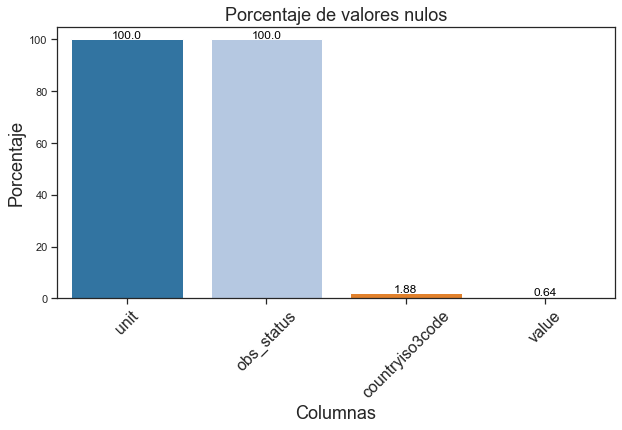

In [157]:
get_missings(data_frame)

#### Las columnas 'unit' y 'obs_status' se encuentran completamente vacias por lo cual serán descartadas.

#### Por otra parte la columna country tiene un 1.87% de valores nulos y la columna population un 0.64%, estos registros por la cantidad que representan serán descartados.

In [158]:
data_frame[data_frame['countryiso3code'].isna()]

,country_name,countryiso3code,date,value,unit,obs_status,decimal
992,Heavily indebted poor countries (HIPC),NaN,2021,1.241374e+09,NaN,NaN,0
993,Heavily indebted poor countries (HIPC),NaN,2020,1.240685e+09,NaN,NaN,0
994,Heavily indebted poor countries (HIPC),NaN,2019,1.234830e+09,NaN,NaN,0
995,Heavily indebted poor countries (HIPC),NaN,2018,1.229837e+09,NaN,NaN,0
996,Heavily indebted poor countries (HIPC),NaN,2017,1.224139e+09,NaN,NaN,0
...,...,...,...,...,...,...,...
2971,Upper middle income,NaN,1964,1.188526e+09,NaN,NaN,0
2972,Upper middle income,NaN,1963,1.161693e+09,NaN,NaN,0
2973,Upper middle income,NaN,1962,1.134490e+09,NaN,NaN,0
2974,Upper middle income,NaN,1961,1.118631e+09,NaN,NaN,0


In [159]:
data_frame[data_frame['value'].isna()]

,country_name,countryiso3code,date,value,unit,obs_status,decimal
2170,North America,NaN,2021,NaN,NaN,NaN,0
2171,North America,NaN,2020,NaN,NaN,NaN,0
2172,North America,NaN,2019,NaN,NaN,NaN,0
2173,North America,NaN,2018,NaN,NaN,NaN,0
2174,North America,NaN,2017,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
16301,West Bank and Gaza,PSE,1964,NaN,NaN,NaN,0
16302,West Bank and Gaza,PSE,1963,NaN,NaN,NaN,0
16303,West Bank and Gaza,PSE,1962,NaN,NaN,NaN,0
16304,West Bank and Gaza,PSE,1961,NaN,NaN,NaN,0


#### La columna 'decimal' está formada unicamente por ceros, será descartada.

In [160]:
data_frame[data_frame['decimal'] != 0]

,country_name,countryiso3code,date,value,unit,obs_status,decimal


### El primer año del que se tiene registro

In [161]:
data_frame['date'].min()

1960

### El año más reciente del que se tiene registro

In [162]:
data_frame['date'].max()

2021

# Distribucion de los datos
#### Se encuentra un sesgo positivo, una gran cantidad de datos se concentra alrededor del cero y hay una larga cola hacia la derecha.

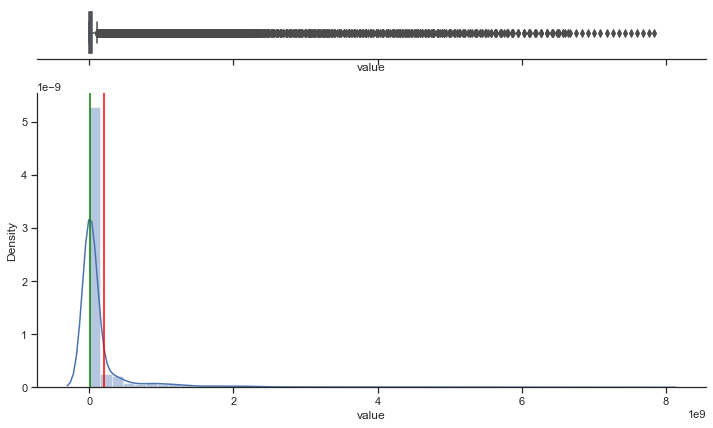

In [163]:
sns.set(style="ticks")
x = data_frame['value'].dropna()
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12,7))

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
plt.axvline(x = x.mean(), c = 'red')
plt.axvline(x = x.median(), c = 'green')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.show()

## Para trabajar con distribuciónes con sesgo positivo se recomienda una transformación logarítmica, esto puede ayudar a mejorar el desempeño del modelo.

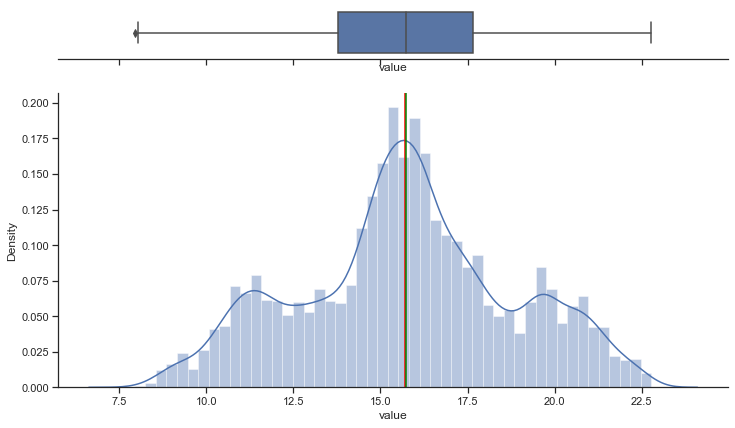

In [164]:
sns.set(style="ticks")
x = np.log1p(data_frame['value'].dropna())
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12,7))

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
plt.axvline(x = x.mean(), c = 'red')
plt.axvline(x = x.median(), c = 'green')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.show()